In [1]:
!git clone https://github.com/YizhongHu/rocket_circularization
!mv ./rocket_circularization/* ./

Cloning into 'rocket_circularization'...
remote: Enumerating objects: 351, done.
remote: Counting objects: 100% (351/351), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 351 (delta 202), reused 280 (delta 133), pack-reused 0
Receiving objects: 100% (351/351), 19.55 MiB | 22.95 MiB/s, done.
Resolving deltas: 100% (202/202), done.


In [2]:
import rocket_gym
from DQN import DeepQNetwork

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import FileLink

/kaggle/working/animation.py:217: DeprecationWarning: invalid escape sequence \h
  ax.set_title('Thrust Direction (Angle from $\hat{r}$)')
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:585: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:637: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool,

2022-08-09 21:21:30.718775: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/opt/conda/lib/python3.7/site-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 17,411
Trainable params: 17,411
Non-trainable params: 0
_________________________________________________________________
Episode: 0


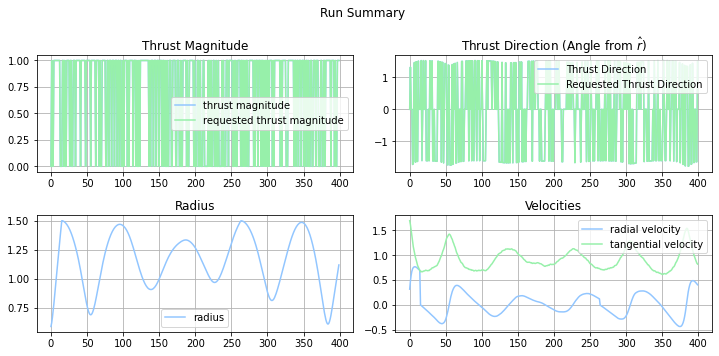

iters: 400, tot_rwd: -1.059e+02
Episode: 1
iters: 400, tot_rwd: -2.417e+02
Episode: 2
iters: 400, tot_rwd: -2.658e+02
Episode: 3
iters: 400, tot_rwd: -2.783e+02
Episode: 4
iters: 400, tot_rwd: -2.860e+02
Episode: 5
iters: 400, tot_rwd: -2.759e+02
Episode: 6
iters: 400, tot_rwd: -2.838e+02
Episode: 7
iters: 400, tot_rwd: -2.806e+02
Episode: 8
iters: 400, tot_rwd: -2.838e+02
Episode: 9
iters: 400, tot_rwd: -2.887e+02


In [3]:
model = DeepQNetwork(dims=[3, 128, 128, 3],
                        epsilon=1.0, epsilon_decay=.1, gamma=.95,
                        memory=100000, start_updating=10000,
                        batch_size=32, learning_rate=1e-4, descent_frequency=64, update_frequency=8,
                        use_target=True, target_frequency=8)
# model.load('./pdlm_ddpg_destablized/')
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    model.train(env, episodes=10, render_frequency=100, summary=True)
    model.save('./dqn_test_6/')

In [4]:
model.save('./dqn_test_6/')

In [5]:
!zip -r ./dqn_test_6.zip ./dqn_test_6

  adding: dqn_test_6/ (stored 0%)
  adding: dqn_test_6/.data-00000-of-00001 (deflated 10%)
  adding: dqn_test_6/experience.pk (deflated 56%)
  adding: dqn_test_6/.index (deflated 48%)
  adding: dqn_test_6/checkpoint (deflated 34%)


In [6]:
FileLink(r'./dqn_test_6.zip')

/kaggle/working/dqn_test_6.zip

In [7]:
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    # model.load('./dqn_test_5/')
    # model.simulate(env, render=True, evaluation=True, path='test.mp4')

In [8]:
#rs = np.linspace(0.5, 1.5, 100)
#rdts = np.linspace(-10, 10, 100)
#rm, rdtm = np.meshgrid(rs, rdts)
#inputs = np.hstack(
#    (rm.reshape(-1, 1), rdtm.reshape(-1, 1)))
#action = tf.reshape(tf.argmax(model.q_net(inputs), axis=-1), (100, 100))

#cs = plt.contourf(rm, rdtm, action - 1, label='max Q value')
#plt.colorbar(cs)
#plt.xlabel('radius')
#plt.ylabel('r dot')
#plt.legend()
#plt.show()